In [5]:
"""module docstring"""
from itertools import permutations
import csv
from typing import List, Dict
from fractions import Fraction as Ratio
from random import randint, sample

import pandas as pd
import numpy as np
import altair as alt

from altair import Chart
Dat = pd.DataFrame

from src.entities import Bet, Competitor, Forecaster, Game
from src.boards import Boards
from src.book import Book
from src.utils import show

from src.toy.demo import trn

def Dir(object):
    return [x for x in dir(object) if x[0]!='_']

In [11]:
trn.players_df



,score
Austin Cole,3.5
Chris Schröder,2.0
Crawford Collins,1.5
Daniel Harris,2.0
Huthman King,1.0
Mychal Hall,3.0
Pierre Damiba,4.0
Ray Lomeli,0.5
Ryan Allred,0.5
Scott Schindler,4.0


In [5]:
trn.games_df.applymap(show)

,black,white,winner
1,Pierre Damiba,Mychal Hall,Pierre Damiba
2,Huthman King,Pierre Damiba,Huthman King
3,Mychal Hall,Crawford Collins,Mychal Hall
4,Troy Bradley,Daniel Harris,Troy Bradley
5,Pierre Damiba,Crawford Collins,Pierre Damiba
6,Mychal Hall,Zach Angell,Mychal Hall
7,Austin Cole,Daniel Harris,Austin Cole
8,Mychal Hall,Troy Bradley,Mychal Hall
9,Crawford Collins,Chris Schröder,Crawford Collins
10,Scott Schindler,Ray Lomeli,draw


In [4]:
trn.bettors_df

,balance,username
HOUSE,1000.0,@DUMMYNAME
angela,100.0,@angela
hermione,100.0,@DUMMYNAME
dma,100.0,@dma


In [5]:
trn.book_df.applymap(show)

,posted_by,odds,on,amount,taken_by
47017,"(HOUSE, 1000)",1:1,Austin Cole,2,"(NOBODY, 0)"
22405,"(HOUSE, 1000)",1:1,Chris Schröder,2,"(NOBODY, 0)"
93610,"(HOUSE, 1000)",1:1,Crawford Collins,2,"(NOBODY, 0)"
68699,"(HOUSE, 1000)",1:1,Daniel Harris,2,"(NOBODY, 0)"
20527,"(HOUSE, 1000)",1:1,Huthman King,2,"(NOBODY, 0)"
31897,"(HOUSE, 1000)",1:1,Mychal Hall,2,"(NOBODY, 0)"
61338,"(HOUSE, 1000)",1:1,Pierre Damiba,2,"(hermione, 100.0)"
48040,"(HOUSE, 1000)",1:1,Ray Lomeli,2,"(hermione, 100.0)"
74210,"(HOUSE, 1000)",1:1,Ryan Allred,2,"(dma, 100.0)"
29673,"(HOUSE, 1000)",1:1,Scott Schindler,2,"(NOBODY, 0)"


In [6]:
trn.show_taken_bets()

,posted_by,odds,on,amount,taken_by
61338,"(HOUSE, 1000)",1:1,Pierre Damiba,2,"(hermione, 100.0)"
48040,"(HOUSE, 1000)",1:1,Ray Lomeli,2,"(hermione, 100.0)"
74210,"(HOUSE, 1000)",1:1,Ryan Allred,2,"(dma, 100.0)"
72465,"(HOUSE, 1000)",1:1,Troy Bradley,2,"(hermione, 100.0)"
32294,"(HOUSE, 1000)",1:1,Zach Angell,2,"(angela, 100.0)"


In [7]:
trn.get_stake('hermione').applymap(show)

,posted_by,odds,on,amount,taken_by
61338,"(HOUSE, 1000)",1:1,Pierre Damiba,2,"(hermione, 100.0)"
48040,"(HOUSE, 1000)",1:1,Ray Lomeli,2,"(hermione, 100.0)"
72465,"(HOUSE, 1000)",1:1,Troy Bradley,2,"(hermione, 100.0)"
37557,"(hermione, 100.0)",3:1,Pierre Damiba,9,"(NOBODY, 0)"


In [9]:
class Expectation: 
    def __init__(self, bk: Book):
        self.book = bk
    
    def calibration(self, forecaster: str, mode: str = "NULL") -> Chart: 
        '''view expected calibration plot for a forecaster. 
        mode argument: if "NULL" then it projects a uniform random outcome, and shows calibration with respect to that outcome. 
        
        if "IWIN" then it projects the outcome where that forecaster won every bet they placed. 
        '''
        assert mode in ['NULL', 'IWIN']
        
    def make_NULL_outcomes():
        pass
        

In [22]:
class CalibrationViewer: 
    '''view calibration a forecaster's calibration and brier score '''
    def __init__(self, bk: Book, relevant_to_payout: ratio = ratio(1,5), mode: str = "NULL"): 
        self.book = bk
        self.relevant_to_payout = (relevant_to_payout * len(self.book.players_df)).__ceil__()
        self.expectation: bool = any([x=='NOBODY' for x in self.book.games_df.winner.apply(show)])
        
    

In [18]:
# for betid in trn.get_stake('hermione').index: 
#     print(trn.bets[betid])


#trn.bets[[int(x) for x in trn.get_stake('hermione').index]]

trn.book_df

,posted_by,odds,on,amount,taken_by
77867,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d977710>,2,<entities.Forecaster object at 0x7f948d977c18>
36334,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d977748>,2,<entities.Forecaster object at 0x7f948d977d68>
93236,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d977780>,2,<entities.Forecaster object at 0x7f948d977eb8>
68812,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d9777b8>,2,<entities.Forecaster object at 0x7f948d97f048>
11025,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d9777f0>,2,<entities.Forecaster object at 0x7f948d97f198>
10645,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d977828>,2,<entities.Forecaster object at 0x7f948d97f2e8>
64882,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d977860>,2,<entities.Forecaster object at 0x7f948d97fba8>
57844,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d977898>,2,<entities.Forecaster object at 0x7f948d97f9b0>
54435,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d9778d0>,2,<entities.Forecaster object at 0x7f948d977b00>
26794,<entities.Forecaster object at 0x7f948d9773c8>,1,<entities.Competitor object at 0x7f948d977908>,2,<entities.Forecaster object at 0x7f948d97f828>


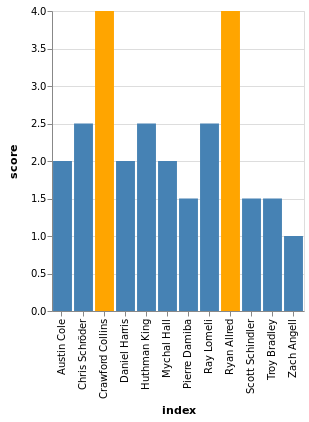

In [40]:
# alt.Chart(trn.players_df.reset_index()
#          ).mark_bar().encode(
#     x='index:N', 
#     y=alt.Y('score:Q', sort="ascending"),
#     color=alt.condition(
#         alt.datum.score > 3.5,
#         alt.value('orange'), 
#         alt.value('steelblue')
#     )
# ).serve()

# help(alt.Y)

In [5]:
trn.show_scores().serve()


Note: if you're in the Jupyter notebook, Chart.serve() is not the best
      way to view plots. Consider using Chart.display().
You must interrupt the kernel to cancel this command.

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [02/Mar/2019 15:48:47] "GET / HTTP/1.1" 200 -



stopping Server...
